# Project: Investigate a No-show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil in the year 2016 and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<li>PatientId - unique patient identificator</li>
<li>AppointmentId - unique appointment identificator</li>
<li>Gender - patient's gender</li>
<li>ScheduledDay - the day the appointment has been registered</li>
<li>AppointmentDay - day of the appointment</li>
<li>Age - patient's age</li>
<li>Neighbourhood - Place of the appointment</li>
<li>Scholarship - check the source</li>
<li>Hipertension</li>
<li>Diabetes</li>
<li>Alcoholism</li>
<li>Handcap</li>
<li>SMS_received - whether the patient has received a message</li>
<li>No-show - important factor that determines whether the patient has shown up for the appointment or not</li>


### Questions for Analysis
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
<br>

- <a href='#rq1'>**Research Question 1**:</a> Is Age a factor that contributes to missing appointmnents?
<br>
- <a href='#rq2'>**Research Question 2**:</a> Did receiving text message affect if People show more for their appointments or not
<br>
- <a href='#rq3'>**Research Question 3**:</a> Is the Neighbourhood or Location where the Hospital is located a factor to why Patients miss their appointment?
<br>
- <a href='#rq4'>**Research Question 4**:</a> Did the time gap in days between Schedule and appointment day a factor in their showing up for their appointment ?
<br>
- <a href='#rq5'>**Research Question 5**:</a> Which Gender is likely to keep appointment?
<br>
- <a href='#rq2'>**Research Question 6**:</a> Does Showing up to appointment have anything to do with being Handicap?

In [83]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [84]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [85]:
# Load your data and print out a few lines. Perform operations to inspect data
df_appoint = pd.read_csv('no_show_appoint.csv')
df_appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [86]:
# The shape shows the numbers rows and columns of the just loaded dataset 
df_appoint.shape


(110527, 14)

The just loaded dataset has 110527 rows and 14 columns

In [87]:
# Shows the descriptive summary of all columns
df_appoint.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [88]:
# Check for any duplictes in our just loaded dataset
df_appoint.duplicated().sum()

0

In [89]:
# Find the description of the 'Age' column 
# Which we can see that there's an age of '-1' and we will need to clean
df_appoint['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [90]:
# Descriptive counts of the 'Neighbourhood' column from the just loaded dataset 
df_appoint['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [91]:
# value_count of Handcap
df_appoint['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Descriptive cases of 'handicap' which shows the number of handicaps a patient might have with their counts
Example: if handicap == 4 it means that a patient has a number of 4 handicaps


> ### Data Cleaning: These are the problems wrong with this Dataset

- #### Structural Problems: Columns name
- #### Incorrect Datatypes
- #### Missing Data
- #### Duplicates and Incorrect Values
 

#### Structural Problems: 
- All columns should be changed to lowercase
<br/>

- Renaming of Columns titles like **'appointmentid'**, **'scheduledday'**,  **'hipertension'**, **'handcap'**, **'no-show'**.
<br/>
- **'appointmentid'** could be dropped (It will not be necessay in the Analysis)

In [92]:
# changing to lowercase
df_appoint.rename(columns=lambda x: x.strip().lower(), inplace=True)


In [93]:
# Renaming necessary columns
df_appoint = df_appoint.rename(columns={'scheduledday' : 'scheduled_day', 'appointmentday' : 'appointment_day', 'no-show' : 'no_show', 'hipertension' : 'hypertension', 'handcap' : 'handicap', 'patientid' : 'patient_id'})


In [94]:
# Dropping the 'appointmentid' column
df_appoint.drop('appointmentid', axis=1, inplace=True)


In [95]:
# Confirm our column change
df_appoint.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> #### Incorrect Datatype
- Change **'scheduled_day'**, **'appointment_day'** from string data types to datetime datatype
- Change **'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received'** from int datatype to bool to fit in our analysis
- Change **'gender', 'neighbourhood'** and **'handicap'** to categorical datatype

In [96]:
# Change to datetime and removing the time format
df_appoint['scheduled_day'] = pd.to_datetime(df_appoint['scheduled_day']).dt.date
df_appoint['appointment_day'] = pd.to_datetime(df_appoint['appointment_day']).dt.date


# Change to bool datatype
col_bool_labels=['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received']
df_appoint[col_bool_labels] =df_appoint[col_bool_labels].astype(bool)

# Change to category datatype
col_catg_labels=['gender', 'neighbourhood', 'handicap']
df_appoint[col_catg_labels] =df_appoint[col_catg_labels].astype('category')

In [97]:
# Check to confirm our datatype change
df_appoint.dtypes

patient_id          float64
gender             category
scheduled_day        object
appointment_day      object
age                   int64
neighbourhood      category
scholarship            bool
hypertension           bool
diabetes               bool
alcoholism             bool
handicap           category
sms_received           bool
no_show              object
dtype: object

> #### Duplicates values
<br/>
     Before dropping the 'appointmentid' column, there was **zero** duplicate values but after there were some duplicate values which are still valid in our analysis. 

**_Because a patient can have an multiple appointments at the same time._**

In [98]:
sum(df_appoint.duplicated())

4222

> #### Dealing with the 'age'

#### Change 'age==-1' to 'age==0'
From our earlier analysis, we found that the was an unrealistic age value of -1 and we need to change that to 0

In [99]:
# Change age=-1 to 0
df_appoint['age'].replace({-1 : 0}, inplace=True)

##### Addition of column "age_class" :
This column is to help us group the ages into age-class or age-groups to help with easy analysis of the age column. This column depends on the 'age' column

In [100]:
#Creating the 'age_class' column
# Bin edges that will be used to "cut" the data into groups
age_edges = [0, 16, 25, 60, 115]

# labels for age class groups
age_class_names = ['Child', 'Teen', 'Working-Class', 'Retiree']

# Using Pandas.cut to assign values to the column
df_appoint['age_class'] = pd.cut(df_appoint['age'], age_edges, labels=age_class_names)


After the addition of the 'age_class', they were some missing values which we will have to drop

In [101]:
# Confirm the datatype change and the general info of our dataset
df_appoint.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_class
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,No,Retiree
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,No,Working-Class
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,No,Retiree
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No,Child
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,No,Working-Class


In [102]:
# Drop rows with missing values
df_appoint.dropna(inplace=True)

In [103]:
df_appoint.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_class
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,No,Retiree
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,No,Working-Class
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,No,Retiree
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No,Child
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,No,Working-Class


> ### Days after Schedule Column:
<br/>
This additional column will help deal with analysis 'if the number of days/time between the scheduled day and appointment adds as a factor to the patients showing up for their appointment
<br/>


In [104]:
# Finding the numbers of days difference between schedule and appointment
df_appoint['days_after_scheduled'] = (df_appoint['appointment_day']-df_appoint['scheduled_day']).dt.days

In [105]:
df_appoint.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_class,days_after_scheduled
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,No,Retiree,0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,No,Working-Class,0
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,No,Retiree,0
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No,Child,0
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,No,Working-Class,0


In [106]:
df_appoint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   patient_id            106987 non-null  float64 
 1   gender                106987 non-null  category
 2   scheduled_day         106987 non-null  object  
 3   appointment_day       106987 non-null  object  
 4   age                   106987 non-null  int64   
 5   neighbourhood         106987 non-null  category
 6   scholarship           106987 non-null  bool    
 7   hypertension          106987 non-null  bool    
 8   diabetes              106987 non-null  bool    
 9   alcoholism            106987 non-null  bool    
 10  handicap              106987 non-null  category
 11  sms_received          106987 non-null  bool    
 12  no_show               106987 non-null  object  
 13  age_class             106987 non-null  category
 14  days_after_scheduled  106987 non-nul

In [107]:
df_appoint['days_after_scheduled'].replace({-1 : 1, -6 : 6}, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> Segmenting or Isloating patients that Showed up and those did not show is an easier approach to analysing and answering the necessary questions poised in the dtataset set.

> ```noshow_df``` represents Patients that failed to show up for their appointment.

> ```yeshow_df``` represent those Patient that did not fail to show up for their appointment.

In [108]:
# Isolating Patients that failed to show 
noshows_df = df_appoint[df_appoint['no_show']=='Yes']

# Isolating Patient that did not fail to show
yeshows_df = df_appoint[df_appoint['no_show']=='No']

<a id='rq1'></a>
> ### Research Question 1: Is Age a factor that contributes to missing appointmnents?


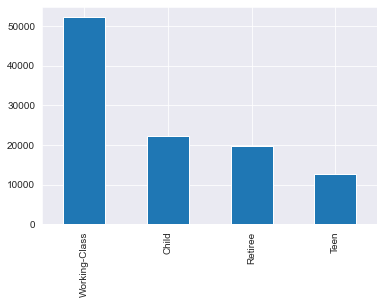

In [109]:
# Visualization of the Counts of each age-classes
df_appoint['age_class'].value_counts().plot( kind='bar');

From Obervation, We coin that Working class has more Patients

> **Working-class** = Age(25-60)
<br/>
> **Child** = Age(0-16)
<br/>
> **Retiree** = Age(61-115)
<br/>
> **Teen** = Age(17-24)


In [110]:
def pie_chart(col_data, caption):
    col_data.value_counts().plot( kind='pie', figsize=(7,7), title=caption, autopct='%.0f%%')

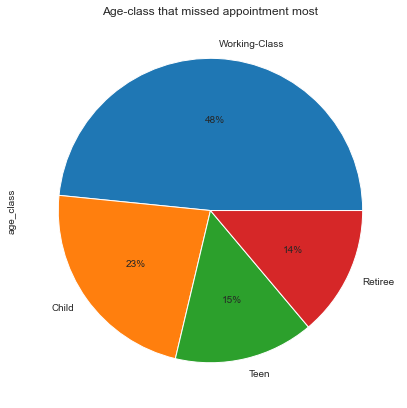

In [111]:
# age_class of those that did not Show up
pie_chart(noshows_df['age_class'], 'Age-class that missed appointment most')

From the Illustration above in relations to those that missed their appointment **noshow_df**, we can deduce that:
> **Working_Class** has 48%
<br/>
> **Child** has 23%
<br/>
> **Teen** has 15%
<br/>
>**Retiree** has 14%

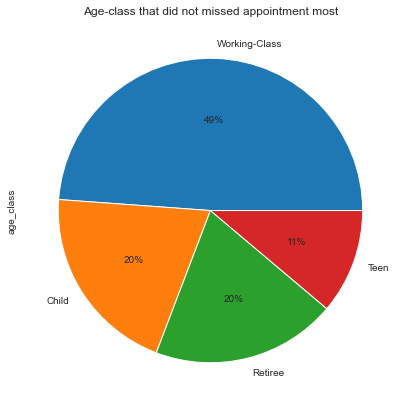

In [112]:
# For Those that did Show up
pie_chart(yeshows_df['age_class'], 'Age-class that did not missed appointment most')

Working-Class is still the highest age_class of patients that and did not miss appointment:
> **Working_Class** has 49%
<br/>
> **Child** has 20%
<br/>
> **Teen** has 20%
<br/>
>**Retiree** has 11%

<a id='rq2'></a>
> ### Research Question 2: Did receiving text message affect if People show more for their appointments or not?
<br/>
Using 'noshows_df' and 'yeshows_df' datasets, we can determine the degree of those we recived text-messages and how it affected turn outs

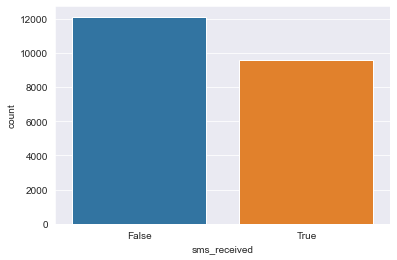

In [113]:
# Count of True/False of SMS that did not show up
sns.countplot(x=noshows_df['sms_received']);

For those that did not Show, they have a higher portion of then that did not receive text message from the illustration above.

About **12000** of them didnt receive SMS text while close to **10000** received

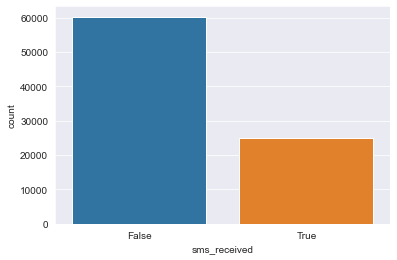

In [114]:
# Count of those True/False of SMS that showed up for appointmnet
sns.countplot(x=yeshows_df['sms_received']);

For those that Show up for their appointment, Majority of them still didnt get the text message. 
About **60000** of them didnt receive SMS text while just  above **20000** received

<a id='rq3'></a>
> ### Research Question 3: Is the Neighbourhood or Location where the Hospital is located a factor to why Patients miss their appointment?

For an easier Analysis, we will be picking the 1st 20 highest Neigbourhood of Patients

In [115]:
# Value count of the top 20 highest neigbourhood
tp20 = df_appoint['neighbourhood'].value_counts().head(20)
print(tp20)

JARDIM CAMBURI       7586
MARIA ORTIZ          5563
RESISTÊNCIA          4235
JARDIM DA PENHA      3851
ITARARÉ              3412
CENTRO               3282
SANTA MARTHA         3041
TABUAZEIRO           3019
JESUS DE NAZARETH    2719
BONFIM               2700
SANTO ANTÔNIO        2673
CARATOÍRA            2489
SANTO ANDRÉ          2458
JABOUR               2396
SÃO PEDRO            2346
ILHA DO PRÍNCIPE     2222
ANDORINHAS           2195
DA PENHA             2155
NOVA PALESTINA       2147
ROMÃO                2126
Name: neighbourhood, dtype: int64


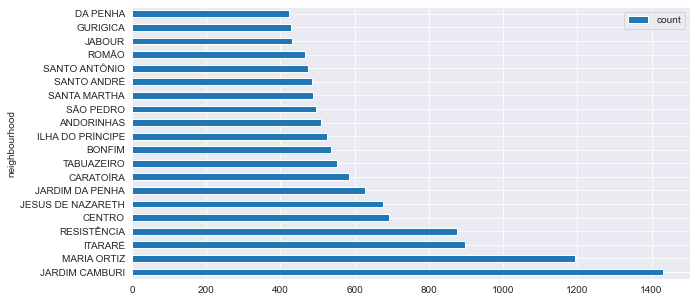

In [116]:
# top 20 neighbourhood in that had more 'NO' show
top20_nnb = noshows_df.groupby('neighbourhood').count()['no_show'].reset_index(name='count').sort_values('count',ascending=False).head(20)

# Plot of the visualization of neigbourhood in relation to the 'noshows_df' dataset
top20_nnb.plot(kind='barh', x='neighbourhood', y='count', figsize=(10,5));

We can see that 'JARDIM CAMBURI' has the highest inflow of Patients that did not make their appointment

<a id='rq4'></a>
> ### Research Question 4: Did the time gap in days between Schedule and appointment day a factor in their showing up for their appointment ?

Having added an extra column to use to analysis this question above, 

In [117]:
noshows_df['days_after_scheduled'].unique()

array([  2,   3,   1,   4,  29,  10,  11,   9,  17,  21,  14,  16,   0,
        24,  22,  28,  31,  42,  45,  39,  38,  18,  50,  60,  43,  44,
        23,  30,  37,  53,  15,  66,  87,  63,  72,  84,  58,  59,  32,
        73,  46,  64,  49,  33,  35,  12,  13,  47,  34,  41,   8,  36,
         7,   6,   5,  26,  40,  19,  25,  20,  61,  55,  27,  69,  70,
        56,  67,  54,  57,  68,  75,  48,  52,  51,  62,  79,  81,  80,
        85,  78,  91,  77, 155, 169, 104, 133, 162, 142,  88, 151, 126,
       111,  65, 103,  89,  74,  71,  76,  90,  96,  95, 102,  86,  83,
       139, 110, 132, 179, 176, 146], dtype=int64)

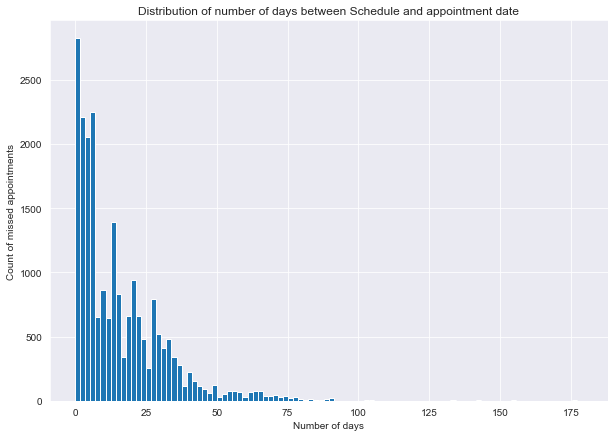

In [118]:
# Distribution of schedule and appointment day-gap of patients that missed their appointment
noshows_df['days_after_scheduled'].hist(bins=100, figsize=(10,7));
plt.xlabel('Number of days')
plt.ylabel('Count of missed appointments')
plt.title('Distribution of number of days between Schedule and appointment date')
plt.show()

From the observation of the visualization of the **noshow_df** dataset above, there is a higher count of missed appointments for Patients with shorter day-gap. 

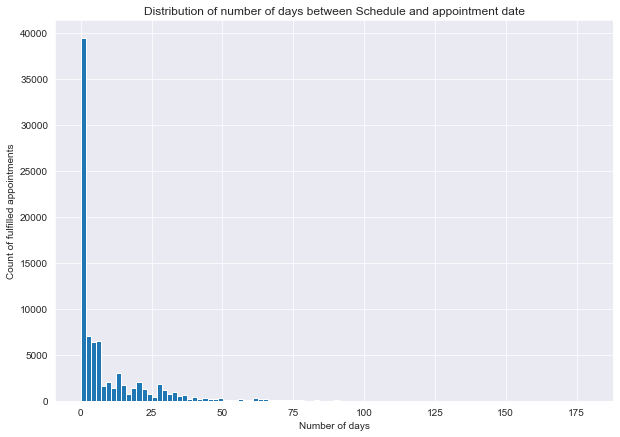

In [119]:
# Distribution of schedule and appointment day-gap of patients that didn't missed their appointment
yeshows_df['days_after_scheduled'].hist(bins=100, figsize=(10,7));
plt.xlabel('Number of days')
plt.ylabel('Count of fulfilled appointments')
plt.title('Distribution of number of days between Schedule and appointment date')
plt.show()

But here **yeshow_df** I observed more alot more appointment were met with shorter time-gap.

<a id='rq5'></a>
> ### Research Question 5: Which Gender is likely to keep appointment? 

In [120]:
df_appoint['gender'].value_counts()

F    70118
M    36869
Name: gender, dtype: int64

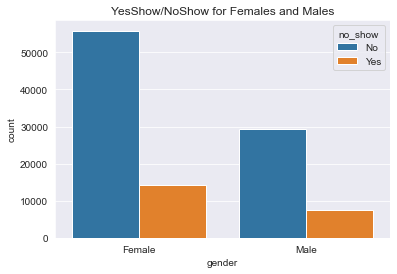

In [121]:
fm = sns.countplot(x='gender', hue='no_show', data=df_appoint,);
fm.set_title('YesShow/NoShow for Females and Males')
fm.set_xticklabels(['Female', 'Male'])
plt.show()

We can Obeserve above that Female patients at a higher proportion than Male Patients that missed and caught their appointment

<a id='rq6'></a>
> ### Research Question 6: Does Showing up to appointment have anything to do with being Handicap?

Using **df_appoint** dataset, we want to know how the numbers of handicap that a patient could have contributed to their showing up and not showing up for their appointment 

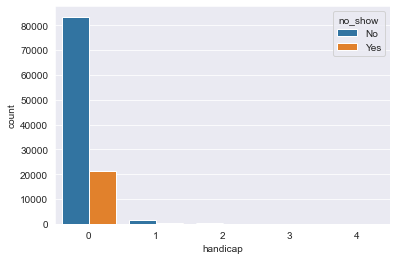

In [122]:
# Comparison 
sns.countplot(x='handicap', hue='no_show', data=df_appoint);

From the Oberservation above, we can coin that patients with **0** handicaps showed up most for their appointment and also did not show up most for their appointment. 

I can also observe that slight rise if those with **1** handicap that still showed up which is higher than those that did not show up.

And also the was hardly any raise in the count of Patient that had more than 1 handicap into relation to showing up and not showing up for their appointments

<a id='conclusions'></a>
## Conclusions

### Research Question 1: Is Age a factor that contributes to missing appointmnents?
Being in the working-class (Age-group of 25-60) factors in to missing appointments most
<br/>
<br/>
### Research Question 2: Did receving text message affect if People show more for their appointments or not?
Sending text message seems to seldomly positive effect reducing Patient absentee
<br/>
<br/>
### Research Question 3: Is the Neighbourhood or Location where the Hospital is located a factor to why Patients miss their appointment?
Neighbourhood or location with more cases or patients tend to have more missed cases.
Location with more patient are linked to Urbanization as we can see with [JARDIM CAMBURI](https://pt.wikipedia.org/wiki/Jardim_Camburi) neighbourhood which has more patient inflow.
<br/>
<br/>
### Research Question 4: Did the time gap in days between Schedule and appointment day a factor in their showing up for their appointment?
Having a shorter time-gap ('days_after_scheduled') is an factor in reducing Patient missing thei appointment.
<br/>
<br/>
### Research Question 5: Which Gender is Likely to keep to appointment the most?
The Female gender is most likely to show up for appointment than the male.
<br/>
<br/>
### Research Question 6: Does Showing up to appointment have anything to do with being Handicap?
Patient with fewer Handicap met their appointment more.

## Limitations

There was not enough Variable or Parameter to explore in depth the correlation between Location of the hospital ('neighbourhood') and whether a Patient will show up and not show up for their Appointment.

In [123]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295